## Preliminary exploratory data analysis

In [95]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

In [97]:

#  sum(cleveland_data == "?")

#loading data
cleveland_data = read_csv("data/processed.cleveland.data", col_names = FALSE)%>%
rename (age = X1 ,sex = X2,cp= X3,trestbps = X4 ,chol= X5,fbs = X6,restecg = X7,thalach = X8,exang = X9,oldpeak = X10,slope = X11,ca = X12,thal = X13,num = X14 )
cleveland_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [99]:
 #Cleaning and wrangling

#turn 1 2 3 4 into 1 
cleveland_data_clean = mutate(cleveland_data, num = ifelse(num >= 1 , 1, 0))%>%
#remove row with missing value 
 filter_all( all_vars(!(.  %in% c('?'))))%>%
#center trestbps ,chol,age column which are more related to heart disease
mutate(scaled_trestbps = scale(trestbps, center = TRUE), 
       scaled_chol = scale(chol, center = TRUE),
      scaled_age = scale(age, center = TRUE))

cleveland_data_clean

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,scaled_trestbps,scaled_chol,scaled_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0.7491157,-0.2759776,0.9346033
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,1.5935769,0.7433005,1.3766051
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,-0.6583195,-0.3529043,1.3766051
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,0.69281830,-1.0452441,1.4871056
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,-0.09534545,-2.2376073,0.2716005
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,-0.09534545,-0.2182826,0.2716005


In [112]:
#training and testing
cleveland_split <- initial_split(cleveland_data_clean, prop = 0.75, strata = num)  
cleveland_training<- training(cleveland_split)
cleveland_testing<- testing(cleveland_split)

In [113]:
#summary and mean values
summary(cleveland_training,)

#missing values are removed in the cleaning process (6 missing values in total)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   :100.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.72   Mean   :0.6726   Mean   :3.135   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :192.0  
      chol            fbs           restecg         thalach     
 Min.   :126.0   Min.   :0.000   Min.   :0.000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:131.0  
 Median :241.0   Median :0.000   Median :1.000   Median :152.0  
 Mean   :247.7   Mean   :0.148   Mean   :1.004   Mean   :148.1  
 3rd Qu.:281.5   3rd Qu.:0.000   3rd Qu.:2.000   3rd Qu.:165.0  
 Max.   :564.0   Max.   :1.000   Max.   :2.000   Max.   :202.0  
     exang           oldpeak          slope           ca           
 Min.   :0.0000

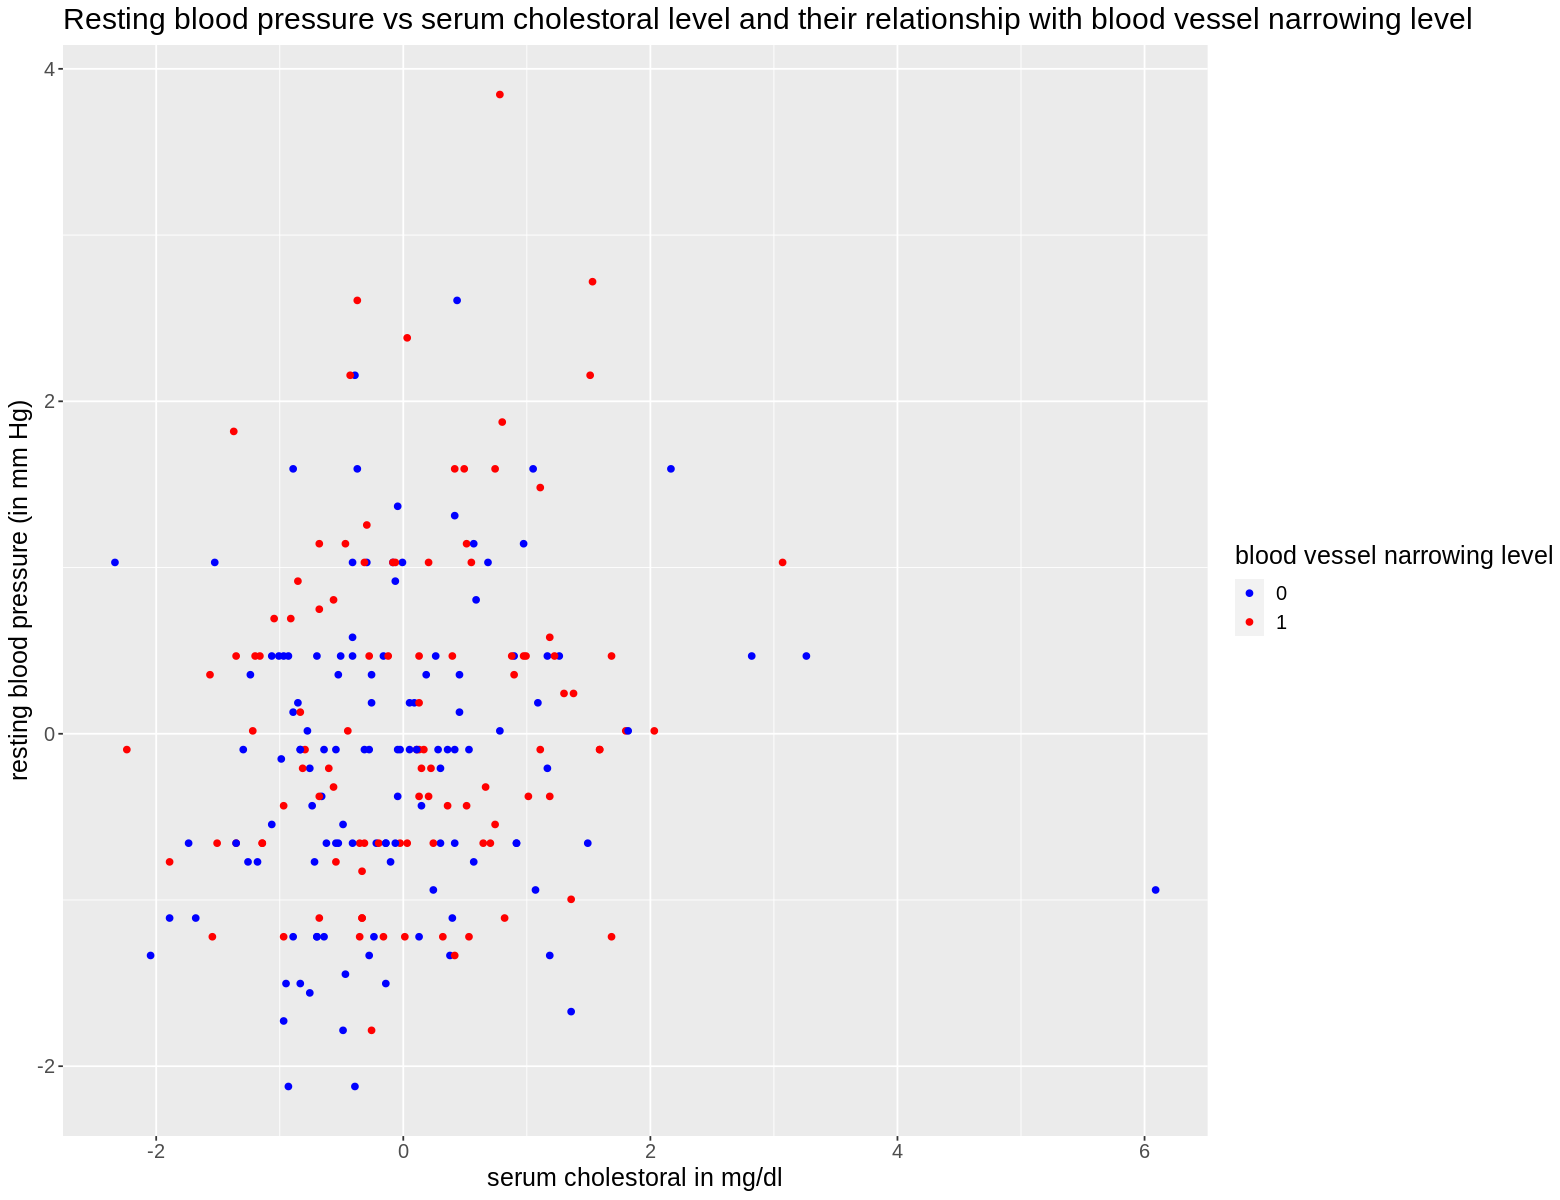

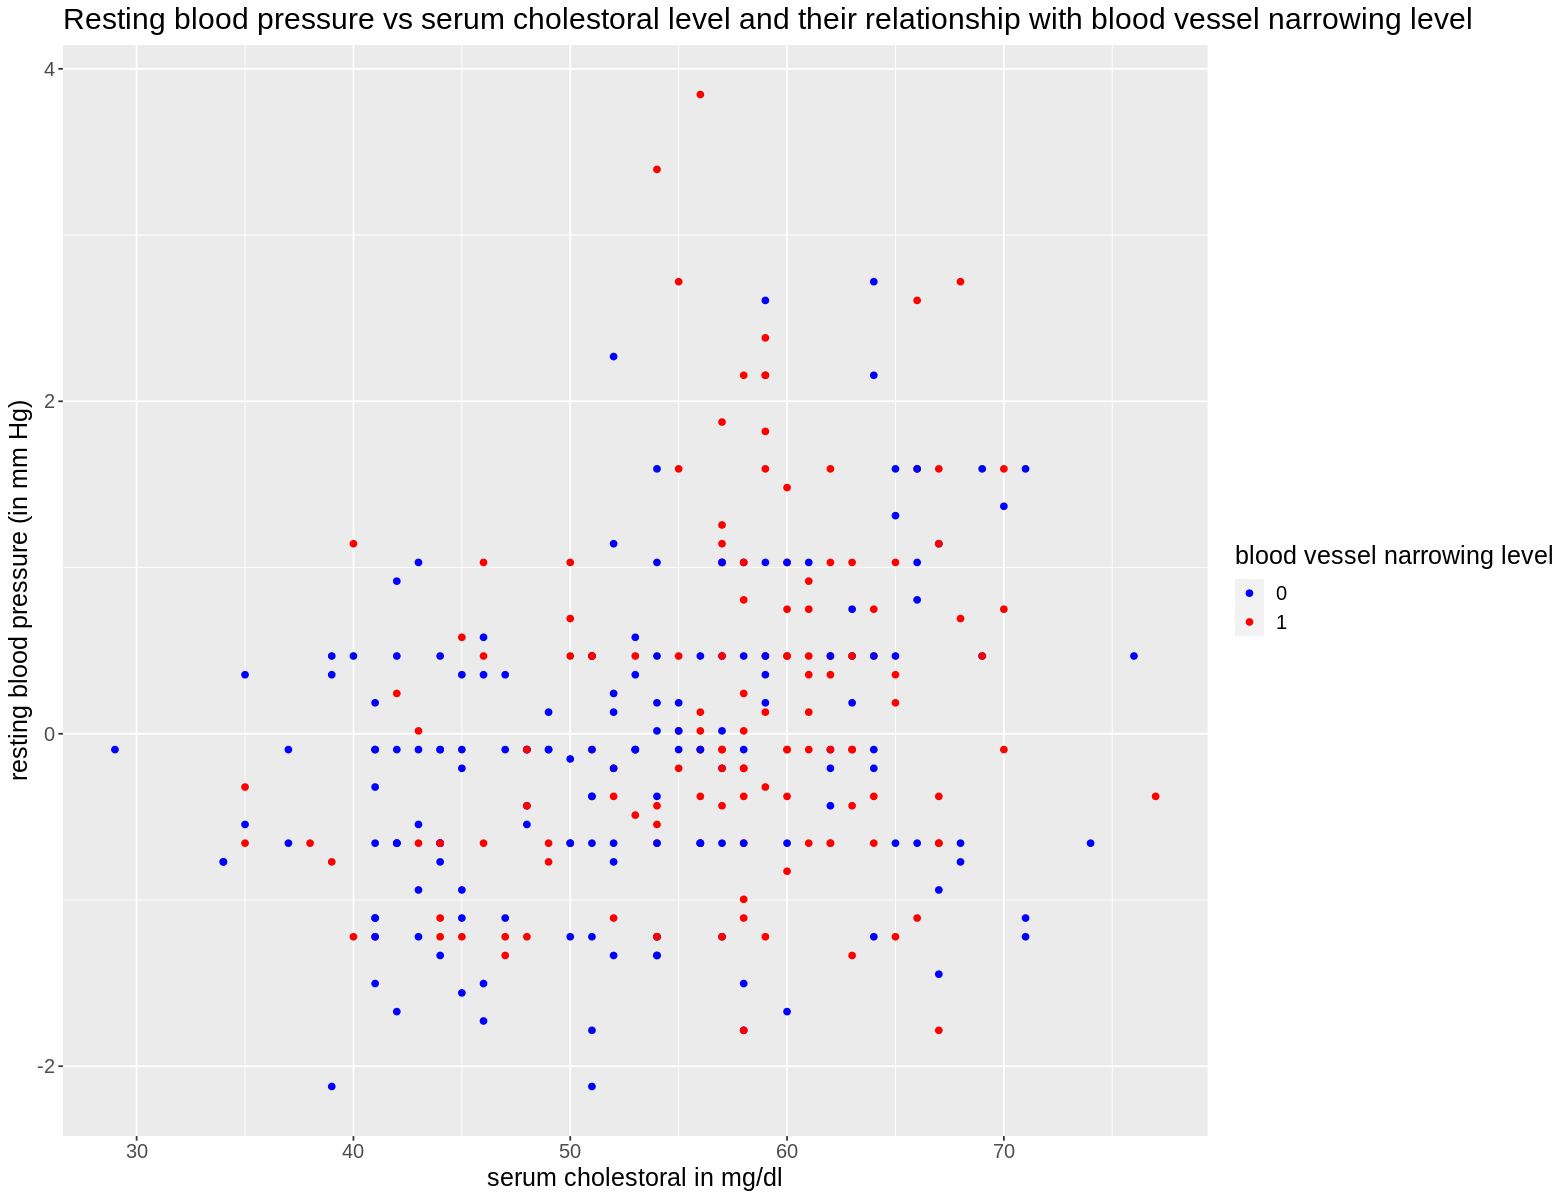

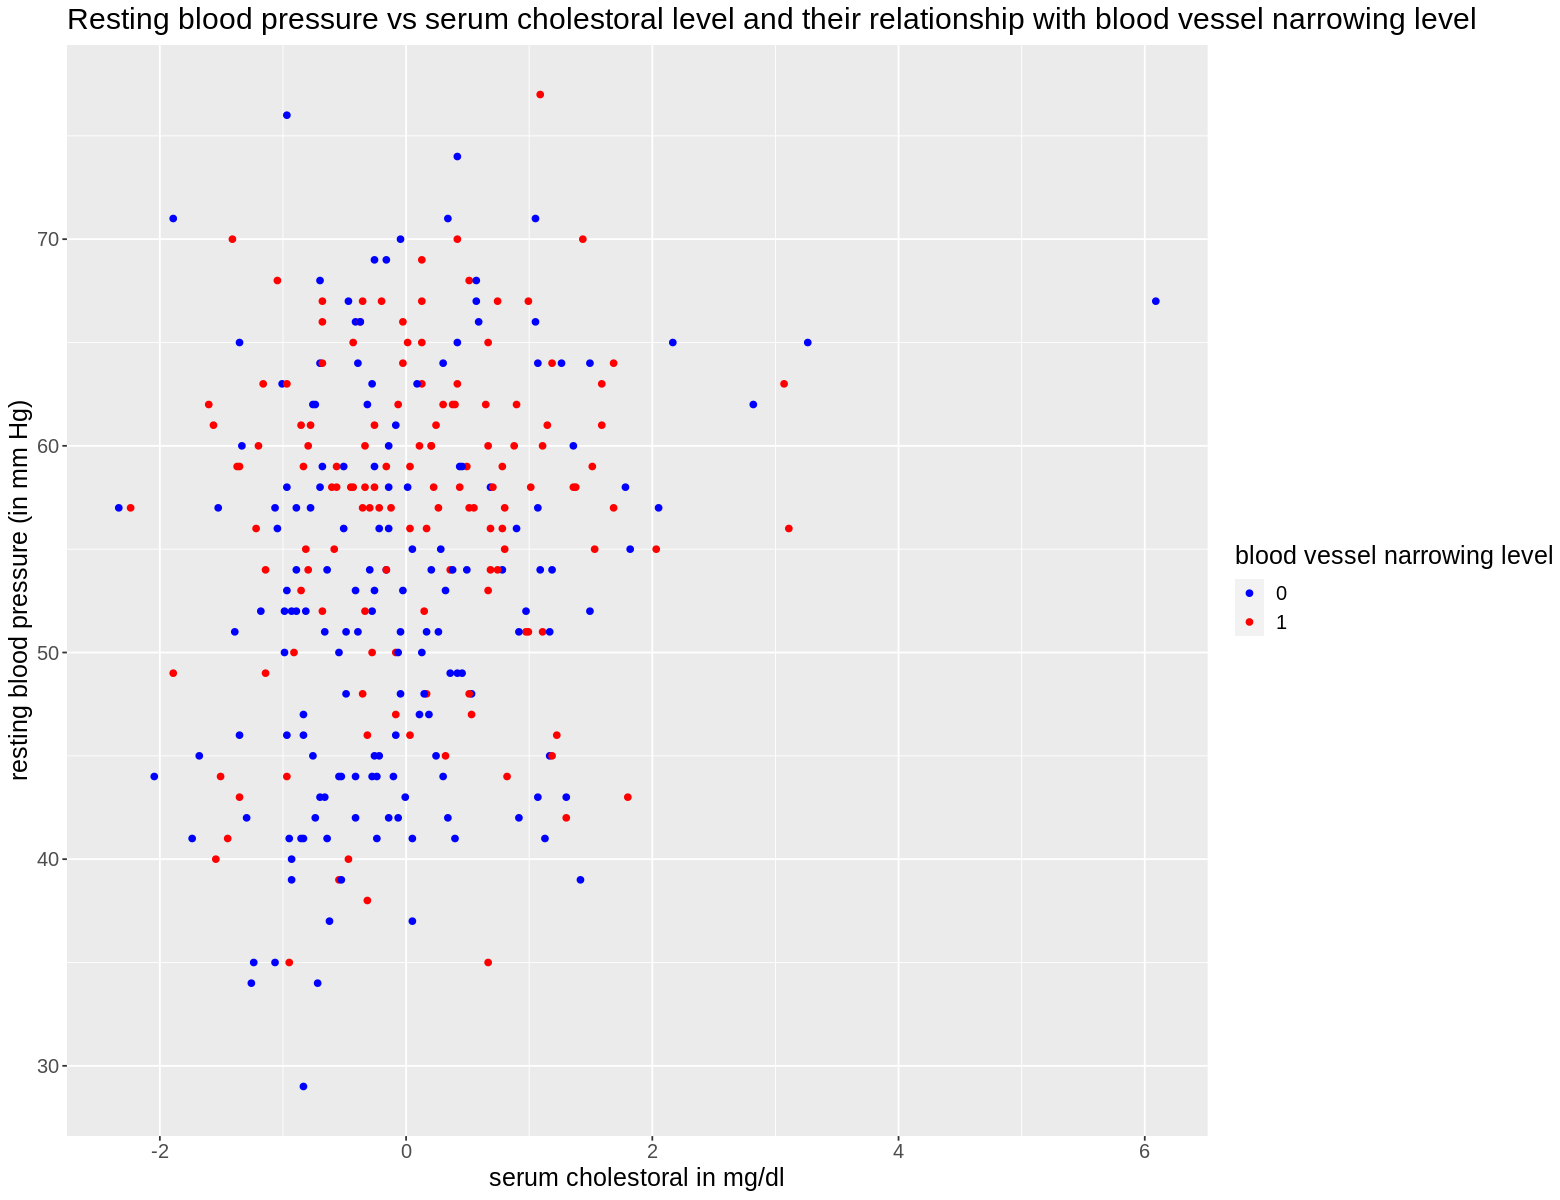

In [110]:
options(repr.plot.width = 13, repr.plot.height = 10)
plotA = cleveland_training %>%
ggplot (aes (x=scaled_chol   , y = scaled_trestbps  , colour = as_factor (num)))+
geom_point()+
labs (x= "serum cholestoral in mg/dl" , y= "resting blood pressure (in mm Hg)", color = "blood vessel narrowing level")+
  scale_color_manual(labels = c("0", "1" ), values = c("blue",  "red")) +
theme (text = element_text (size =15 ))+
ggtitle("Resting blood pressure vs serum cholestoral level and their relationship with blood vessel narrowing level ")
plotA



plotB = cleveland_data_clean %>%
ggplot (aes (x=age   , y = scaled_trestbps  , colour = as_factor (num)))+
geom_point()+
labs (x= "serum cholestoral in mg/dl" , y= "resting blood pressure (in mm Hg)", color = "blood vessel narrowing level")+
  scale_color_manual(labels = c("0", "1" ), values = c("blue",  "red")) +
theme (text = element_text (size =15 ))+
ggtitle("Resting blood pressure vs serum cholestoral level and their relationship with blood vessel narrowing level ")
plotB




plotC = cleveland_data_clean %>%
ggplot (aes (x=scaled_chol   , y = age  , colour = as_factor (num)))+
geom_point()+
labs (x= "serum cholestoral in mg/dl" , y= "resting blood pressure (in mm Hg)", color = "blood vessel narrowing level")+
  scale_color_manual(labels = c("0", "1" ), values = c("blue",  "red")) +
theme (text = element_text (size =15 ))+
ggtitle("Resting blood pressure vs serum cholestoral level and their relationship with blood vessel narrowing level ")
plotC

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_standard
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,1,1,1,1,1,1,1,0,1,1,0.0,6.0,0,0
1,1,1,1,1,0,1,1,1,1,1,3.0,3.0,1,1
1,1,1,1,1,0,1,1,1,1,1,2.0,7.0,1,1
1,1,1,1,1,0,0,1,0,1,1,0.0,3.0,0,0
1,0,1,1,1,0,1,1,0,1,1,0.0,3.0,0,0
1,1,1,1,1,0,0,1,0,1,1,0.0,3.0,0,0
1,0,1,1,1,0,1,1,0,1,1,2.0,3.0,1,1
1,0,1,1,1,0,0,1,1,1,1,0.0,3.0,0,0
1,1,1,1,1,0,1,1,0,1,1,1.0,7.0,1,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,1,1,1,1,1,1,1,0,1,1,0.0,6.0,0
1,1,1,1,1,0,1,1,1,1,1,3.0,3.0,1
1,1,1,1,1,0,1,1,1,1,1,2.0,7.0,1
1,1,1,1,1,0,0,1,0,1,1,0.0,3.0,0
1,0,1,1,1,0,1,1,0,1,1,0.0,3.0,0
1,1,1,1,1,0,0,1,0,1,1,0.0,3.0,0
1,0,1,1,1,0,1,1,0,1,1,2.0,3.0,1
1,0,1,1,1,0,0,1,1,1,1,0.0,3.0,0
1,1,1,1,1,0,1,1,0,1,1,1.0,7.0,1


In [ ]:

cleaveland_data =cleveland_data_raw %>% filter_all( all_vars(!(.  %in% c('?'))))
mutate( num = ifelse(num >= 1 , 1, 0))
cleveland_data


In [79]:
count(cleveland_data_clean )

n
<int>
297
